In [1]:
# 기본 라이브러리 불러오기
from scipy.misc import imread
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, ImageColorGenerator
import os
import pandas as pd

In [2]:
# 파일 이름으로 데이터 불러와서 컬럼명 바꿔주고, 날짜 바꿔주는 함수
# 
def read_data(filename):
    colnames = ['nickname', 'id', 'date', 'tweet']
    path_twt = 'c:/python/workshopd/tweets/'
    data = pd.read_excel(path_twt + filename, header = 0)
    data.columns = colnames
    data['date'] = pd.to_datetime(data['date'], format = '%Y년 %m월 %d일')
    data.reset_index(inplace = True)
    data.drop(['index'], axis = 1, inplace = True)
    return data

In [3]:
# 
def read_data2(filename):
    colnames = ['nickname', 'id', 'date', 'tweet']
    path_twt = 'c:/python/workshopd/tweets/'
    data = pd.read_excel(path_twt + filename, header = 0)
    data.columns = colnames
    data.reset_index(inplace = True)
    data.drop(['index'], axis = 1, inplace = True)
    return data

In [13]:
import re
from konlpy.tag import Twitter

def get_twts(filename):
    data = read_data(filename)
    regex = r'[가-힣]+'    # 한글만 모조리 불러오자
    parsed_twt = data['tweet'].map(lambda x: ' '.join(re.findall(regex, x)))
    processed_twt = ' '.join(parsed_twt)
    twt_pos = Twitter().pos(processed_twt, norm = True, stem = True)
    stop_words = ['세월호', '참사', '유가족']
    twt_noun = [''.join(k) for (k, v) in twt_pos if v == 'Noun' and len(k) > 1 and k not in stop_words]
    return ' '.join(twt_noun)

In [5]:
def get_twts2(filename):
    data = read_data2(filename)
    regex = r'[가-힣]+'    # 한글만 모조리 불러오자
    parsed_twt = data['tweet'].map(lambda x: ' '.join(re.findall(regex, x)))
    processed_twt = ' '.join(parsed_twt)    
    twt_pos = Twitter().pos(processed_twt, norm = True, stem = True)
    stop_words = ['세월호', '참사', '유가족']
    twt_noun = [''.join(k) for (k, v) in twt_pos if v == "Noun" and len(k) > 1 and k not in stop_words]
    return ' '.join(twt_noun)

In [15]:
import random

def grey_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(50, 100)

def draw_wc(filename, logo_name):
    path_logo = 'c:/python/workshopd/sewol logos/'
    logo = imread(path_logo + logo_name)
    image_color = ImageColorGenerator(logo)
    data = get_twts(filename)
    wc = WordCloud(width = 1920, height = 1280, font_path = "C:\Windows\Fonts\YoonGothic750.otf",
               background_color = "black", ranks_only = True, mask = logo,
               color_func = grey_color_func, max_words = 500)
    wc.generate(data)
    plt.axis('off')
    plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3))
    return wc.to_file(filename[:-5] + '.png')

In [16]:
draw_wc('20141110.xlsx', '배.png')

TypeError: expected string or bytes-like object

In [10]:
def draw_wc2(filename, logo_name):
    path_logo = 'c:/python/workshopd/sewol logos/'
    logo = imread(path_logo + logo_name)
    image_color = ImageColorGenerator(logo)
    data = get_twts2(filename)
    wc = WordCloud(width = 1920, height = 1280, font_path = "C:\Windows\Fonts\YoonGothic750.otf",
               background_color = "black", ranks_only = True, mask = logo,
               color_func = grey_color_func, max_words = 500)
    wc.generate(data)
    plt.axis('off')
    plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3))
    return wc.to_file(filename[:-5] + '.png')

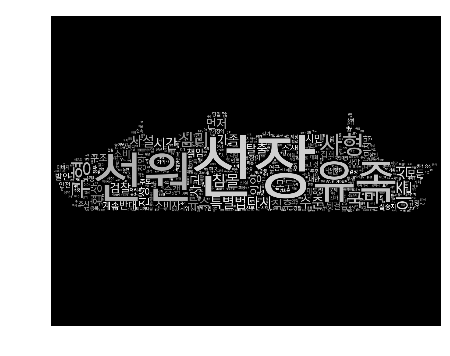

In [17]:
draw_wc2('20141027.xlsx', '배.png')

In [35]:
import os
path = 'C:/python/workshopd/tweets/'
files = os.listdir(path)

str

TypeError: expected string or bytes-like object